In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
metrics = pd.read_csv('results/CNN_metrics.csv')
metrics = pd.concat([metrics, pd.read_csv('results/CAML_metrics.csv')])
metrics = pd.concat([metrics, pd.read_csv('results/LSTM_metrics.csv')])
metrics = pd.concat([metrics, pd.read_csv('results/LSTMattn_metrics.csv')])
metrics = metrics.drop(['Unnamed: 0'], axis=1).reset_index(drop=True)
metrics.to_csv('results/metrics.csv', index=False)
metrics.columns = ['Model', 'Recall@10', 'Micro-F1', 'Macro-F1', 'Micro-AUC', 'Macro-AUC']
metrics

,Model,Recall@10,Micro-F1,Macro-F1,Micro-AUC,Macro-AUC
0,CNN,0.795921,0.654957,0.252662,0.975341,0.849977
1,KSI+CNN,0.794596,0.648176,0.257143,0.977149,0.892318
2,ModifiedKSI+CNN,0.806644,0.657078,0.302292,0.979864,0.906118
3,"ModifiedKSI+CNN, tfidf",0.805992,0.654831,0.315643,0.979958,0.900311
4,CAML,0.804295,0.658478,0.242736,0.976341,0.835053
5,KSI+CAML,0.802898,0.645164,0.236395,0.978455,0.891229
6,ModifiedKSI+CAML,0.806717,0.648025,0.277652,0.979899,0.901053
7,"ModifiedKSI+CAML, tfidf",0.807575,0.641387,0.267787,0.980487,0.903659
8,LSTM,0.714209,0.583105,0.081270,0.965439,0.822408
9,KSI+LSTM,0.762193,0.593273,0.189226,0.974259,0.879568


In [3]:
print(tabulate(metrics, tablefmt='latex_raw', showindex=False, 
               headers=metrics.columns, floatfmt=".3f"))

\begin{tabular}{lrrrrr}
\hline
 Model                       &   Recall@10 &   Micro-F1 &   Macro-F1 &   Micro-AUC &   Macro-AUC \\
\hline
 CNN                         &       0.796 &      0.655 &      0.253 &       0.975 &       0.850 \\
 KSI+CNN                     &       0.795 &      0.648 &      0.257 &       0.977 &       0.892 \\
 ModifiedKSI+CNN             &       0.807 &      0.657 &      0.302 &       0.980 &       0.906 \\
 ModifiedKSI+CNN, tfidf      &       0.806 &      0.655 &      0.316 &       0.980 &       0.900 \\
 CAML                        &       0.804 &      0.658 &      0.243 &       0.976 &       0.835 \\
 KSI+CAML                    &       0.803 &      0.645 &      0.236 &       0.978 &       0.891 \\
 ModifiedKSI+CAML            &       0.807 &      0.648 &      0.278 &       0.980 &       0.901 \\
 ModifiedKSI+CAML, tfidf     &       0.808 &      0.641 &      0.268 &       0.980 &       0.904 \\
 LSTM                        &       0.714 &      0.583 &     

In [4]:
cnn_aucs = pd.read_csv('results/CNN_aucs.csv').assign(type='CNN')
caml_aucs = pd.read_csv('results/CAML_aucs.csv').assign(type='CAML')
lstm_aucs = pd.read_csv('results/LSTM_aucs.csv').assign(type='LSTM')
lstmattn_aucs = pd.read_csv('results/LSTMattn_aucs.csv').assign(type='LSTMattn')

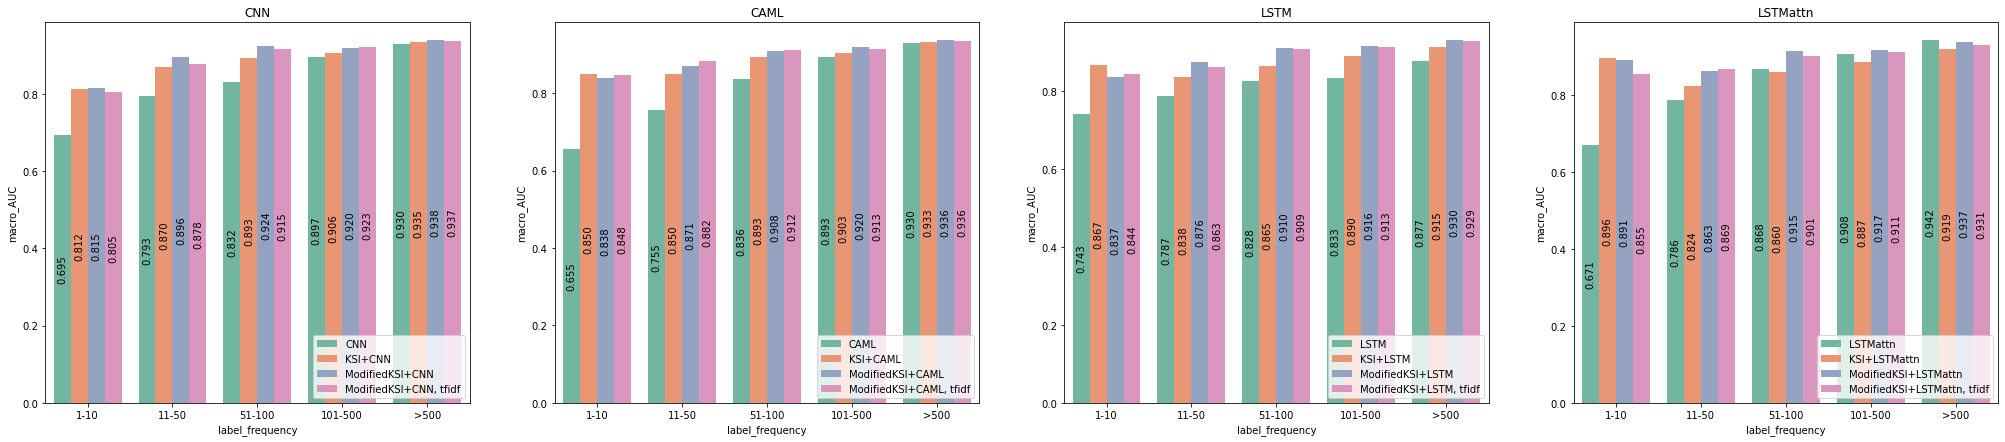

In [8]:
pal = sns.set_palette("Set2")
fig, axs = plt.subplots(1, 4, figsize=(35, 7))
for i, aucs in enumerate([cnn_aucs, caml_aucs, lstm_aucs, lstmattn_aucs]):
    sns.barplot(x='label_frequency', y='macro_AUC', hue='model', data=aucs, ax=axs[i], palette=pal)
    axs[i].legend(loc='lower right')
    for container in axs[i].containers:
        axs[i].bar_label(container, fmt='%.3f', rotation=90, label_type='center')
    title = aucs['type'].max()
    axs[i].set_title(title)
plt.savefig(f'results/aucs.png')